In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def input_func():
    def f(x): return np.sinh(x)

    left_border, dots_count, right_border = 0, 6, 2

    dots = []
    for i in range(dots_count):
        x = left_border + (right_border - left_border) * i / (dots_count - 1)
        y = f(x)
        dots += [(x, y)]

    return dots, f

## Метод прогонки для трехдиагональной матрицы

In [3]:
def three_diag_solve(A, b):
    A = A.copy()
    b = b.copy()
    n = len(A)

    A[0][1] /= A[0][0]
    for i in range(1, n - 1):
        A[i][i + 1] /= (A[i][i] - A[i][i - 1] * A[i - 1][i])

    b[0] /= A[0][0]
    for i in range(1, n):
        b[i] = (b[i] - A[i][i - 1] * b[i - 1]) / (A[i][i] - A[i][i - 1] * A[i - 1][i])

    x = np.zeros(n)
    x[-1] = b[-1]
    for i in range(n - 2, -1, -1):
        x[i] = b[i] - A[i][i + 1] * x[i + 1]

    return x

## Построение кубического сплайна

In [13]:
def spline_built(dots):
    n = len(dots) - 1
    (x, y) = map(list, zip(*dots))

    h = [None]
    for i in range(1, n + 1):
        h += [x[i] - x[i - 1]]

    A = [[None] * n for i in range(n)]

    for i in range(1, n):
        for j in range(1, n):
            A[i][j] = 0.0

    for i in range(1, n - 1):
        A[i + 1][i] = h[i + 1]

    for i in range(1, n):
        A[i][i] = 2 * (h[i] + h[i + 1])

    for i in range(1, n - 1):
        A[i][i + 1] = h[i + 1]

    F = []
    for i in range(1, n):
        F += [3 * ((y[i + 1] - y[i]) / h[i + 1] - (y[i] - y[i - 1]) / h[i])]

    A = [A[i][1:] for i in range(len(A)) if i]

    c = three_diag_solve(A, F)
    c = [0.0] + list(c) + [0.0]

    def evaluate(xdot):
        for i in range(1, len(x)):
            if x[i - 1] <= xdot <= x[i]:
                val = 0
                val += y[i]
                b = (y[i] - y[i - 1]) / h[i] + (2 * c[i] + c[i - 1]) * h[i] / 3
                val += b * (xdot - x[i])
                val += c[i] * ((xdot - x[i]) ** 2)
                d = (c[i] - c[i - 1]) / (3 * h[i])
                val += d * ((xdot - x[i]) ** 3)
                return val
        return None

    def output():
        print("Cubic spline:", '\n')
        for i in range(1, len(x)):
            val = 0
            b = (y[i] - y[i - 1]) / h[i] + (2 * c[i] + c[i - 1]) * h[i] / 3
            d = (c[i] - c[i - 1]) / (3 * h[i])
            print(f"[{x[i - 1]}, {x[i]}) ->")
            print(np.poly1d([d, c[i], b, y[i]]), '\n')

    return evaluate, output

## Решение задания

Cubic spline interpolation 

(x,y) = [(0.0, 0.0), (0.4, 0.4107523258028155), (0.8, 0.888105982187623), (1.2, 1.5094613554121725), (1.6, 2.37556795320023), (2.0, 3.626860407847019)] 

Cubic spline: 

[0.0, 0.4) ->
        3          2
0.1617 x + 0.1941 x + 1.079 x + 0.4108 

[0.4, 0.8) ->
        3          2
0.2319 x + 0.4724 x + 1.345 x + 0.8881 

[0.8, 1.2) ->
        3          2
0.1199 x + 0.6163 x + 1.781 x + 1.509 

[1.2, 1.6) ->
        3         2
0.8627 x + 1.651 x + 2.688 x + 2.376 

[1.6, 2.0) ->
        3
-1.376 x + 3.348 x + 3.627 

          f(1.0) = 1.1752011936438014
Cubic Spline(1.0) = 1.1770094994938658
      delta(1.0) = 0.0018083058500644178


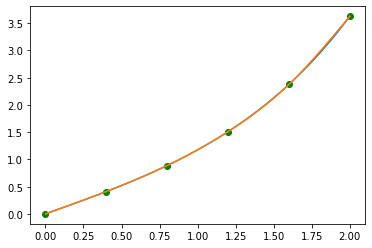

In [14]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 1.0
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

## Тестовый пример 1

Cubic spline interpolation 

(x,y) = [(0.0, 1.0), (1.1111111111111112, 0.4436660217022285), (2.2222222222222223, -0.6063209223738354), (3.3333333333333335, -0.981674004711079), (4.444444444444445, -0.2647498781834829), (5.555555555555555, 0.7467529543114478), (6.666666666666667, 0.9273677030509753), (7.777777777777778, 0.07613012462407193), (8.88888888888889, -0.859815004003662), (10.0, -0.8390715290764524)] 

Cubic spline: 

[0.0, 1.1111111111111112) ->
         3          2
-0.1181 x - 0.3937 x - 0.7923 x + 0.4437 

[1.1111111111111112, 2.2222222222222223) ->
        3          2
0.2307 x + 0.3752 x - 0.8129 x - 0.6063 

[2.2222222222222223, 3.3333333333333335) ->
         3          2
0.04712 x + 0.5323 x + 0.1954 x - 0.9817 

[3.3333333333333335, 4.444444444444445) ->
         3        2
-0.1147 x + 0.15 x + 0.9534 x - 0.2647 

[4.444444444444445, 5.555555555555555) ->
         3          2
-0.1699 x - 0.4163 x + 0.6575 x + 0.7468 

[5.555555555555555, 6.666666666666667) ->
       

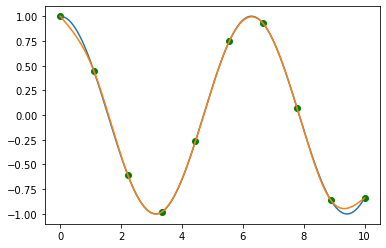

In [19]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 2.0
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

## Тестовый пример 2

Cubic spline interpolation 

(x,y) = [(1.0, 1.0), (2.0, 0.5), (3.0, 0.3333333333333333), (4.0, 0.25), (5.0, 0.2)] 

Cubic spline: 

[1.0, 2.0) ->
         3          2
0.08393 x + 0.2518 x - 0.3321 x + 0.5 

[2.0, 3.0) ->
          3            2
-0.08631 x - 0.007143 x - 0.0875 x + 0.3333 

[3.0, 4.0) ->
         3           2
0.01131 x + 0.02679 x - 0.06786 x + 0.25 

[4.0, 5.0) ->
           3
-0.008929 x - 0.04107 x + 0.2 

          f(3.5) = 0.2857142857142857
Cubic Spline(3.5) = 0.28921130952380947
      delta(3.5) = 0.0034970238095237693


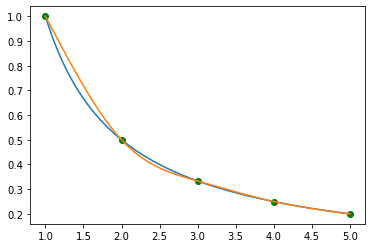

In [26]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 3.5
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

## Тестовый пример 3

Cubic spline interpolation 

(x,y) = [(0.0, 0.0), (0.5, 0.7071067811865476), (1.0, 1.0), (1.5, 1.224744871391589), (2.0, 1.4142135623730951)] 

Cubic spline: 

[0.0, 0.5) ->
         3         2
-0.8537 x - 1.281 x + 0.9874 x + 0.7071 

[0.5, 1.0) ->
        3          2
0.9548 x + 0.1516 x + 0.4229 x + 1 

[1.0, 1.5) ->
         3          2
-0.1969 x - 0.1437 x + 0.4268 x + 1.225 

[1.5, 2.0) ->
         3
0.09582 x + 0.355 x + 1.414 

          f(1.7) = 1.3038404810405297
Cubic Spline(1.7) = 1.3051318646676442
      delta(1.7) = 0.0012913836271144508


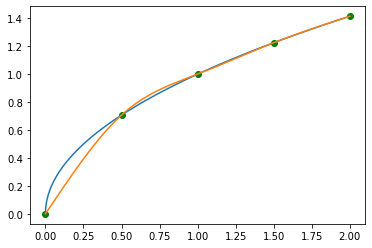

In [30]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 1.7
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

## Тестовый пример 4

Cubic spline interpolation 

(x,y) = [(-4.0, 0.7568024953079282), (-3.5789473684210527, 0.42354465143912423), (-3.1578947368421053, 0.01630136119395508), (-2.736842105263158, -0.393789476483059), (-2.3157894736842106, -0.7350925485799386), (-1.8947368421052633, -0.9479884972487855), (-1.473684210526316, -0.995288323076044), (-1.0526315789473686, -0.8687296180358696), (-0.6315789473684212, -0.5904198559291867), (-0.2105263157894739, -0.2089746240627857), (0.21052631578947345, 0.20897462406278527), (0.6315789473684212, 0.5904198559291867), (1.0526315789473681, 0.8687296180358693), (1.473684210526316, 0.995288323076044), (1.8947368421052628, 0.9479884972487856), (2.3157894736842106, 0.7350925485799386), (2.7368421052631575, 0.3937894764830594), (3.1578947368421053, -0.01630136119395508), (3.578947368421052, -0.42354465143912384), (4.0, -0.7568024953079282)] 

Cubic spline: 

[-4.0, -3.5789473684210527) ->
         3          2
-0.2516 x - 0.3178 x - 0.8807 x + 0.4235 

[-3.578947368421052

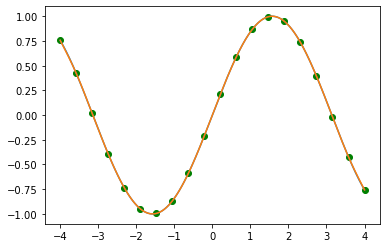

In [34]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 3.5
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

## Тестовый пример 5

Cubic spline interpolation 

(x,y) = [(-1.5, -14.101419947171719), (-1.3421052631578947, -4.296213834793093), (-1.1842105263157894, -2.456583513710662), (-1.0263157894736843, -1.6514280284936969), (-0.868421052631579, -1.1815345903248633), (-0.7105263157894737, -0.8604442318710142), (-0.5526315789473685, -0.6167318572306016), (-0.39473684210526305, -0.4166029673192194), (-0.23684210526315796, -0.24137226688581204), (-0.07894736842105265, -0.07911179644301636), (0.07894736842105265, 0.07911179644301636), (0.23684210526315796, 0.24137226688581204), (0.39473684210526305, 0.4166029673192194), (0.5526315789473686, 0.6167318572306018), (0.7105263157894739, 0.8604442318710146), (0.8684210526315788, 1.1815345903248629), (1.026315789473684, 1.651428028493696), (1.1842105263157894, 2.456583513710662), (1.3421052631578947, 4.296213834793093), (1.5, 14.101419947171719)] 

Cubic spline: 

[-1.5, -1.3421052631578947) ->
        3         2
-524.8 x - 248.6 x + 35.93 x - 4.296 

[-1.3421052631578947,

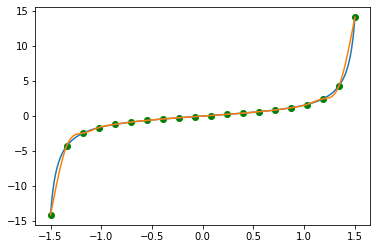

In [40]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 0.7
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

## Тестовый пример 6

Cubic spline interpolation 

(x,y) = [(1.0, 0.0), (2.0, 1.0), (3.0, 1.584962500721156), (4.0, 2.0), (5.0, 2.321928094887362), (6.0, 2.584962500721156), (7.0, 2.807354922057604), (8.0, 3.0), (9.0, 3.169925001442312), (10.0, 3.321928094887362)] 

Cubic spline: 

[1.0, 2.0) ->
         3          2
-0.1005 x - 0.3016 x + 0.7989 x + 1 

[2.0, 3.0) ->
         3           2
0.08768 x - 0.03859 x + 0.4587 x + 1.585 

[3.0, 4.0) ->
           3           2
-0.005063 x - 0.05378 x + 0.3663 x + 2 

[4.0, 5.0) ->
          3           2
0.009389 x - 0.02561 x + 0.2869 x + 2.322 

[5.0, 6.0) ->
          3           2
0.001721 x - 0.02045 x + 0.2409 x + 2.585 

[6.0, 7.0) ->
          3           2
0.001977 x - 0.01452 x + 0.2059 x + 2.807 

[7.0, 8.0) ->
          3           2
0.001266 x - 0.01072 x + 0.1807 x + 3 

[8.0, 9.0) ->
            3           2
-1.375e-05 x - 0.01076 x + 0.1592 x + 3.17 

[9.0, 10.0) ->
          3
0.003587 x + 0.1484 x + 3.322 

          f(3.5) = 1.8073549220576042

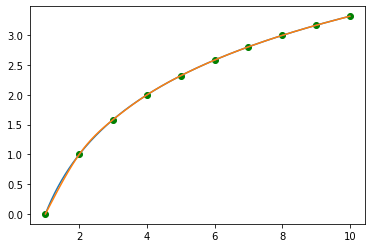

In [49]:
print("Cubic spline interpolation \n")
plot_dots = 10 ** 4

dots, f = input_func()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
x_plot = np.linspace(min(x), max(x), plot_dots)

y_plot = [f(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

spl, output = spline_built(dots)
y_plot = [spl(xdot) for xdot in x_plot]
plt.plot(x_plot, y_plot)

output()

xdot = 3.5
print(f"          f({xdot}) =", f(xdot))
print(f"Cubic Spline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()